# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [360]:
# Import the following libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Validation

The dataset contains **15000 rows and 8 columns** before cleaning and validation.
- week: 6 numeric values as weeks sales were made, counted as weeks since product launch without missing values or invalid values. No cleaning is needed.
- sales_method: 5 character values as sales methods used for customers without missing values or invalid values. But since the sale must have 3 unique values [Email, Call, Email + Call] corresponding to each sales method, the column has 2 invalid values em + call and email. Cleaning is needed to ensure there are 3 distinct values for each sales method without invalid values. 
- customer_id: 15000 character values as unique identifiers for customers without missing values or invalid values. No cleaning is needed.
- nb_sold: 10 numeric values as number of new products sold without missing values. No cleaning is needed.
- revenue: 6734 numeric values as revenue from sales rounded to 2 decimal places with 1074 missing values and 0 invalid values. Cleaning is needed to ensure handle missing values. For each missing value, they need to be replaced with the mean revenue rounded to 2 decimal places corresponding to each sales method.
- years_as_customer: 42 numeric values as number of years customers bought from us without missing values but with 2 invalid values. Since our company was founded in 1984, we assume that the maximum number of years we can have any customers depends on how many years since the foundation of our company. The values 47 and 63 are considered invalid values so cleaning is needed to ensure that there are no rows with invalid values.
- nb_site_visits: 27 numeric values as number of times the customer has visited our website in the last 6 months without missing values or invalid values. No cleaning is needed.
- state: 50 character values as corresponding locations of the customers where orders are shipped without missing values or invalid values. No cleaning is needed.

In [361]:
# Import the dataset
sales = pd.read_csv("product_sales.csv")
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [362]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [363]:
# Check the week column for missing values or invalid values
print(sales['week'].value_counts())
print(sales['week'].nunique())

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64
6


In [364]:
print(sales['week'].isnull().sum())

0


In [365]:
# Check the sales_method column for missing values or invalid values
print(sales['sales_method'].value_counts())
print(sales['sales_method'].nunique())

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64
5


In [366]:
print(sales['sales_method'].isnull().sum())

0


In [367]:
# Clean sales_method column to ensure only 3 unique values by manipulating strings
sales.loc[sales['sales_method'] == 'em + call', 'sales_method'] = 'Email + Call'
sales.loc[sales['sales_method'] == 'email', 'sales_method'] = 'Email'
print(sales['sales_method'].value_counts())
print(sales['sales_method'].nunique())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64
3


In [368]:
# Check the customer_id column for missing values or invalid values
print(sales['customer_id'].value_counts())

2e72d641-95ac-497b-bbf8-4861764a7097    1
e0c955c5-50b4-43dc-bfdd-e181ac3c8e50    1
8a7a36dd-8fdc-4d08-b87d-4f1548f723be    1
f7c7fcbe-ac44-4e62-a470-b04eb19fb5a1    1
9149e07e-cd2f-4a94-a97b-2f2f475afdbb    1
                                       ..
c1779213-7d49-494b-9aec-f488290bff5a    1
16d14cab-0900-4759-9c18-8569dae8c711    1
3cd54608-5e34-4340-976e-61725b41d175    1
ede3a4b7-94bf-46b2-8bd2-55e009b7c0a9    1
4e077235-7c17-4054-9997-7a890336a214    1
Name: customer_id, Length: 15000, dtype: int64


In [369]:
print(sales['customer_id'].isnull().sum())

0


In [370]:
# Check the nb_sold column for missing values or invalid values
print(sales['nb_sold'].value_counts())
print(sales['nb_sold'].nunique())

10    3677
9     3535
11    2439
8     1941
12    1088
13     939
7      698
15     555
14      97
16      31
Name: nb_sold, dtype: int64
10


In [371]:
print(sales['nb_sold'].isnull().sum())

0


In [372]:
# Check the revenue column for missing values or invalid values
print(sales['revenue'].value_counts())

51.86     11
52.51     10
53.25     10
52.68      9
51.71      9
          ..
187.37     1
86.37      1
125.97     1
182.53     1
64.90      1
Name: revenue, Length: 6743, dtype: int64


In [373]:
print(sales['revenue'].isnull().sum())

1074


In [374]:
# Replace the missing values in the revenue column with the mean revenue grouped by sales method
mean_revenue_by_sales_method = sales.groupby('sales_method')['revenue'].transform('mean').round(2)
sales['revenue'] = sales['revenue'].fillna(mean_revenue_by_sales_method)
print(sales['revenue'].value_counts())

97.13     546
183.65    351
47.60     181
51.86      11
52.51      10
         ... 
187.37      1
86.37       1
125.97      1
182.53      1
64.90       1
Name: revenue, Length: 6744, dtype: int64


In [375]:
print(sales['revenue'].isnull().sum())

0


In [376]:
# Check the years_as_customer column for missing values or invalid values
print(sales['years_as_customer'].value_counts())
print(sales['years_as_customer'].nunique())

1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
33       8
34       8
28       8
31       6
32       5
29       5
35       5
36       4
39       3
38       2
37       2
63       1
47       1
Name: years_as_customer, dtype: int64
42


In [377]:
print(sales['years_as_customer'].isnull().sum())

0


In [378]:
# Based on the fact that the company was founded in 1984, check for any rows with years that are longer than the number of years
# since the foundation of the company
current_year = datetime.now().year
num_of_years = current_year - 1984
sales[sales['years_as_customer'] > num_of_years]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [379]:
# Replace invalid values with maximum number of years
current_year = datetime.now().year
num_of_years = current_year - 1984
sales.loc[sales['years_as_customer'] > num_of_years, 'years_as_customer'] = num_of_years
sales[sales['years_as_customer'] > num_of_years]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [380]:
print(sales['years_as_customer'].value_counts())
print(sales['years_as_customer'].nunique())

1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
33       8
34       8
28       8
31       6
32       5
29       5
35       5
36       4
39       3
38       2
37       2
41       2
Name: years_as_customer, dtype: int64
41


In [381]:
# Check the nb_site_visits column for missing values or invalid values
print(sales['nb_site_visits'].value_counts())
print(sales['nb_site_visits'].nunique())

25    1688
26    1645
24    1601
23    1478
27    1440
22    1200
28    1175
21     908
29     893
30     654
20     600
19     426
31     371
32     250
18     217
33     114
17     113
16      80
34      51
35      33
15      31
36      14
14       7
37       5
13       4
12       1
41       1
Name: nb_site_visits, dtype: int64
27


In [382]:
print(sales['nb_site_visits'].isnull().sum())

0


In [383]:
# Check the state column for missing values or invalid values
print(sales['state'].value_counts())
print(sales['state'].nunique())

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [384]:
print(sales['state'].isnull().sum())

0


In [385]:
# Check for duplicated rows
duplicate_rows = sales[sales.duplicated()]
duplicate_rows

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [386]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.13,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.13,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [387]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


After cleaning and validating the data, the dataset contains **15000 rows and 8 columns** without missing values or invalid values.

## Exploratory Analysis
### How many customers were there for each approach?
We want to find out how many customers were there for each sales approach. After visualizing the number of customers for each sales approach in a countplot below, we find that 7466 customers use Email, 4962 customers use Call, and 2572 customers use Email + Call. If we only want to find the best approach based on the number of customers, we can conclude that email is the best method.

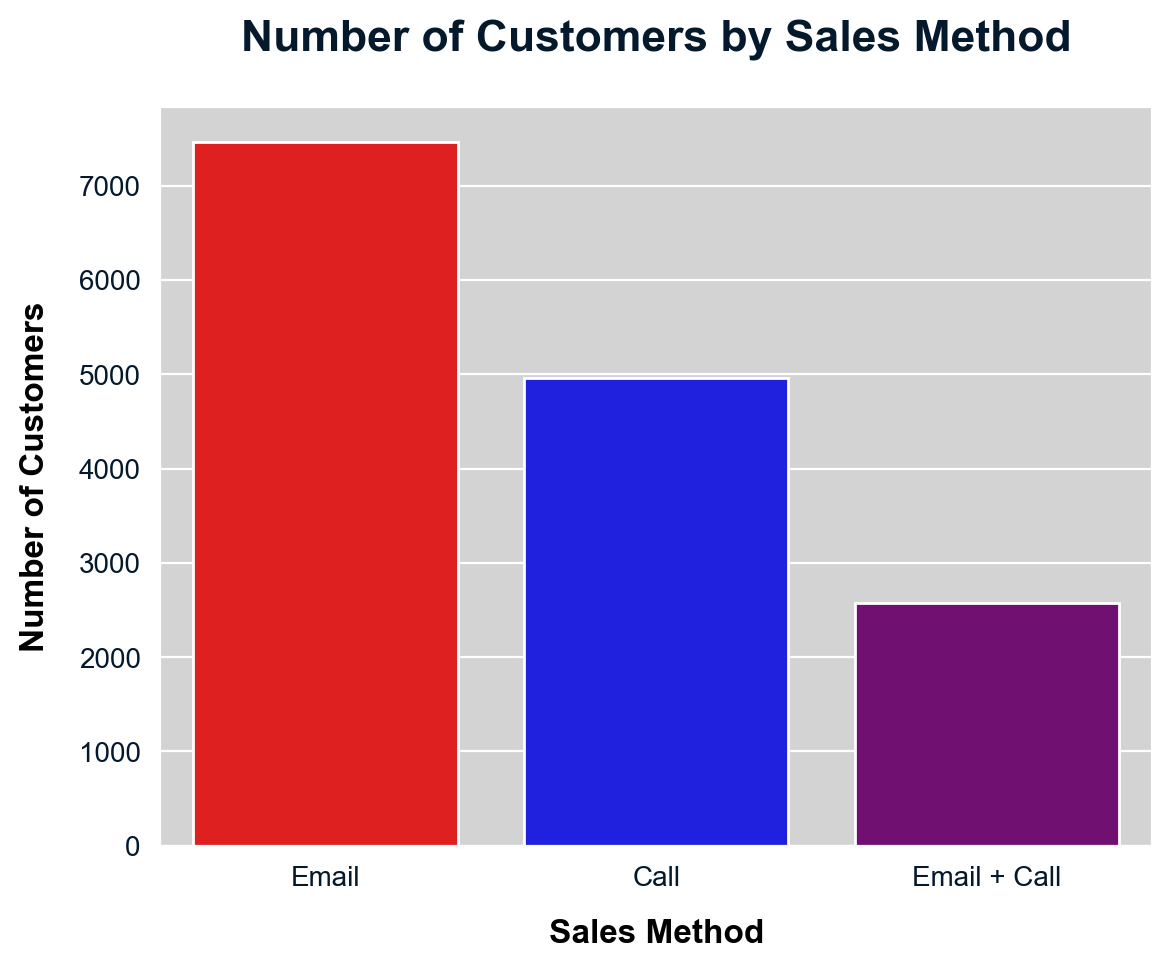

In [388]:
# Create a countplot to show number of customers for each sales method.
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
sns.countplot(x="sales_method", data=sales, order=sales["sales_method"].value_counts().index, palette=["red", "blue", "purple"])
plt.title("Number of Customers by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Sales Method", fontsize=12, weight="bold", color="black", labelpad=10)
plt.ylabel("Number of Customers", fontsize=12, weight="bold", color="black", labelpad=10)
plt.show()

In [389]:
# Find the number of customers for each sales method.
print(sales["sales_method"].value_counts())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


### What does the spread of the revenue look like overall and for each method?
We want to find out what the spread of the revenue looks like. Based on the histogram below, we find that the highest revenue range from 50 to 90. We could assume that any revenue above 120 and any lowest sales in revenue such as 70 could be outliers.

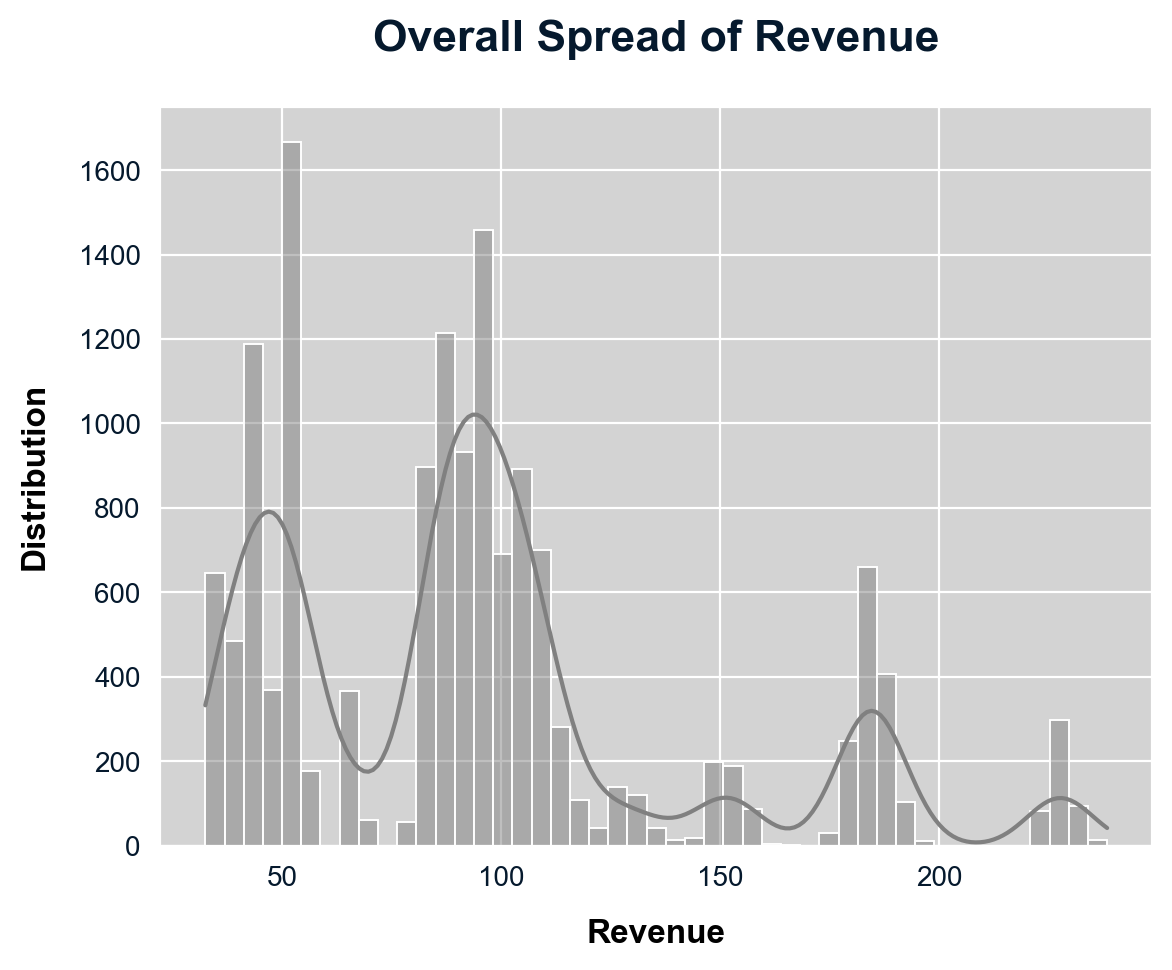

In [390]:
# Create a histogram to show the overall spread of revenue.
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
sns.histplot(sales["revenue"], color="gray", kde=True)
plt.title("Overall Spread of Revenue", fontsize=16, weight="bold", pad=20)
plt.xlabel("Revenue", fontsize=12, weight="bold", color="black", labelpad=10)
plt.ylabel("Distribution", fontsize=12, weight="bold", color="black", labelpad=10)
plt.show()

We also want to find the spread of revenue for each sales method. From the multiple boxplots below, we can see revenue for Email range from under 100 to above 100, revenue for Call range mostly around 50, and revenue for Email + Call range from under 150 to around 200. As we go over the plot, we can see outliers. The outliers for Email at around 150 suggest successful marketing campaigns. The outliers for Call above 50 suggest moderate sales and occassionally higher sales. And Email + Call show very high sales due to combined communication methods, leading to higher customer engagement. Therefore, we can conclude that the Email + Call method can be the best method based on spread of revenue by sales method.

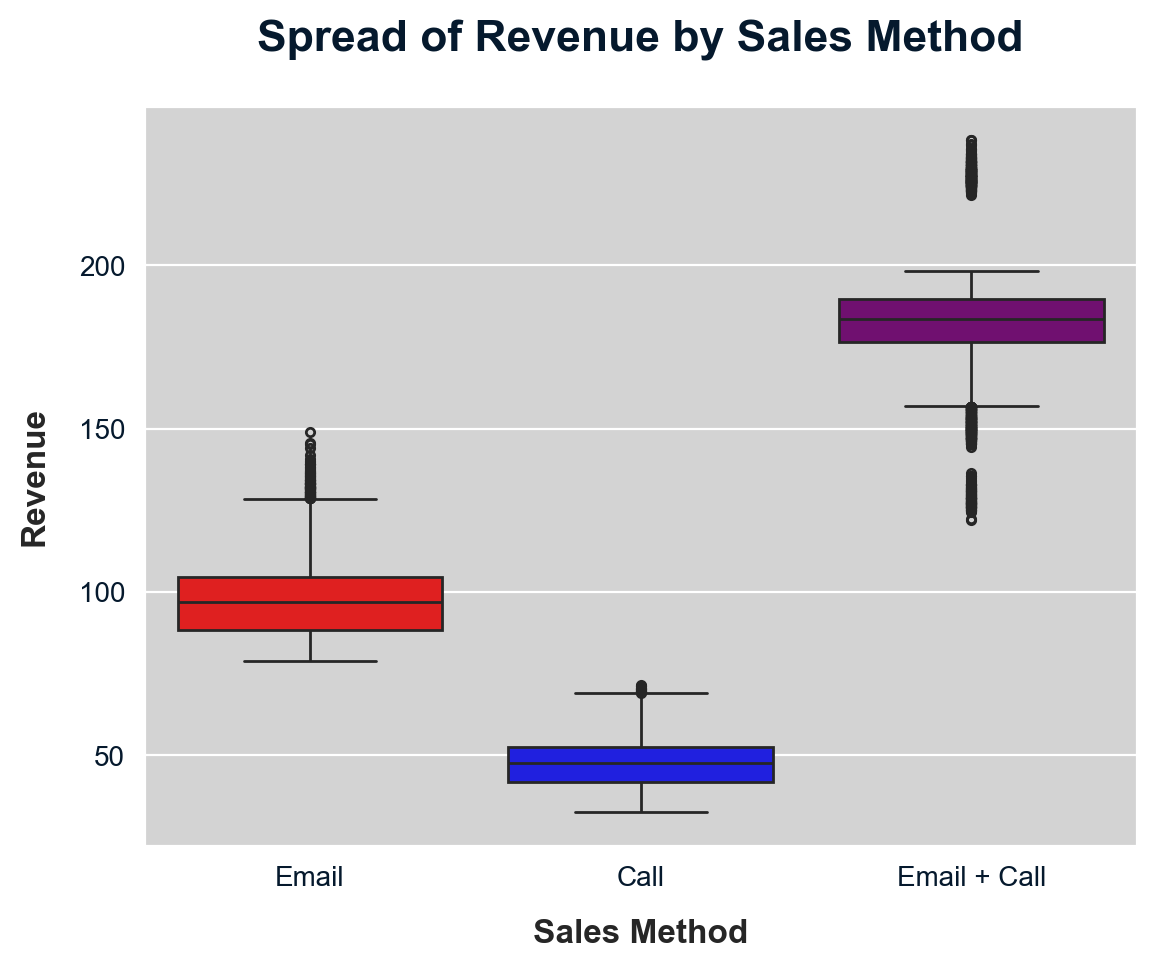

In [391]:
# Create a boxplot to show the spread of revenue for each sales method.
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
flierprops = dict(marker=".", color="black")
sns.boxplot(x="sales_method", y="revenue", data=sales, color="gray", flierprops=flierprops, palette=["red", "blue", "purple"], order=sales["sales_method"].value_counts().index)
plt.title("Spread of Revenue by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Sales Method", fontsize=12, weight="bold", labelpad=10)
plt.ylabel("Revenue", fontsize=12, weight="bold", labelpad=10)
plt.show()

### Was there any difference in revenue over time for each of the methods?
To find the difference in revenue over time for each sales method, we will need to use a lineplot to visualize revenue over time by sales method. In the lineplot below, we find that during the first week, the Email method generated the highest revenue at 248123.12, followed by the Call method at 27015.98 and the Email + Call method at 20007.38. We can conclude that the Email method could be the best method during the first week but it is important to note that the email method requires the least effort from the sales team.

Over the course of six weeks, there are significant changes in revenue generated by the three sales approaches. The Email method shows a consistent decrease in revenue, meaning that there could be diminishing returns from using the email method as time goes on. The Call method shows an overall increase in revenue over time but the amount of revenue it generated decreases towards the end of the 6 week period. And the Email + Call method shows a healthy increasing trend in revenue over the 6 week period, suggesting increased long term revenue growth over time due to a combination of sales approaches.

In conclusion, in terms of long term revenue growth, the Email + Call method is overall the best method to use although it requires the most effort from the sales team. On the other hand, the Email method shows the strong but steady decline in revenue and the Call method shows the overall increasing trend in revenue but with some fluctuations. It is recommended to consider which sales method to use for revenue generation based on effort and efficiency.

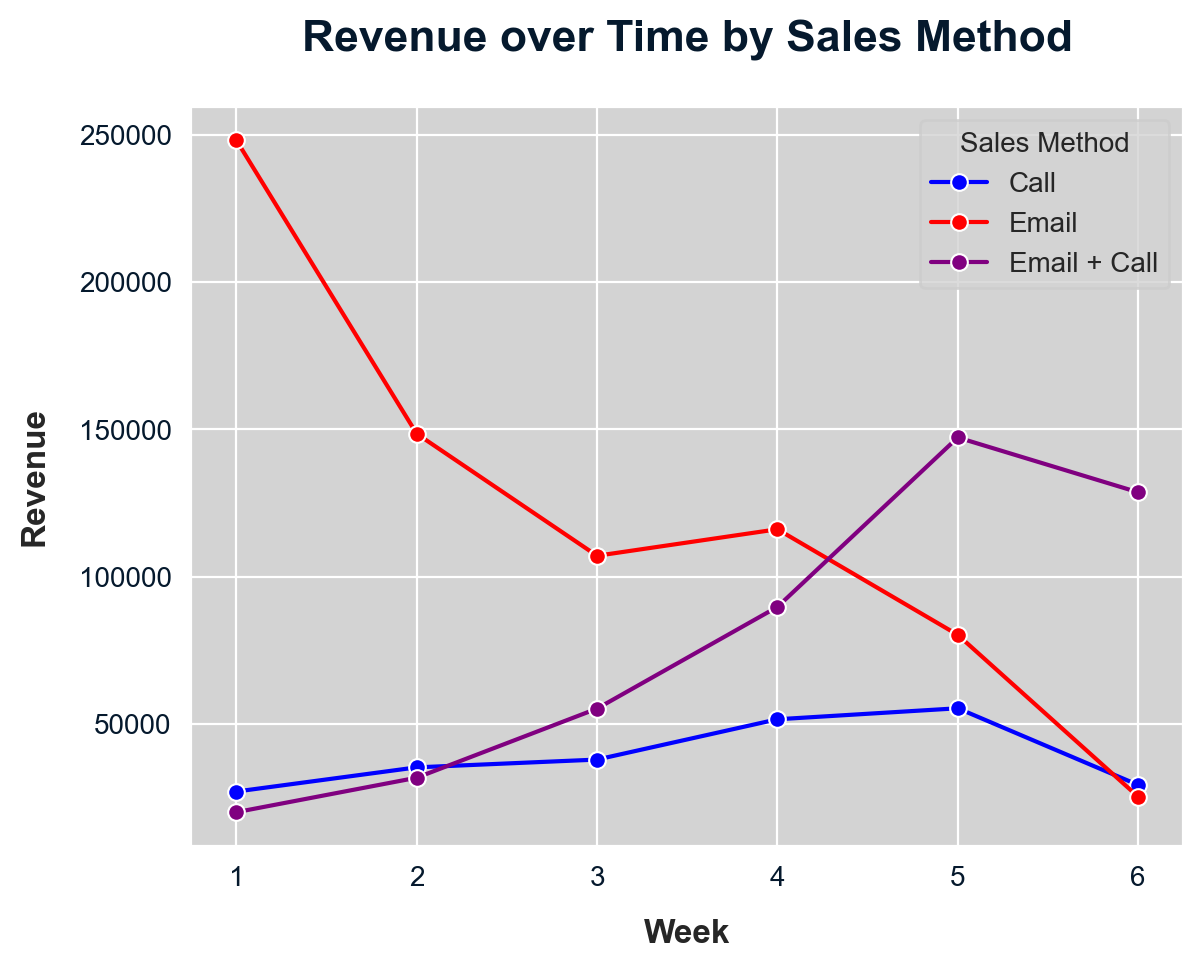

In [392]:
# Create a lineplot to show revenue over time for each sales method.
revenue_over_time = sales.groupby(["week", "sales_method"])["revenue"].sum().unstack().reset_index()
revenue_over_time_by_sales_method = revenue_over_time.melt(id_vars="week", var_name="sales_method", value_name="revenue")
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
sns.lineplot(x="week", y="revenue", hue="sales_method", data=revenue_over_time_by_sales_method, palette={"Call": "blue", "Email": "red", "Email + Call": "purple"}, marker="o")
plt.title("Revenue over Time by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Week", fontsize=12, weight="bold", labelpad=10)
plt.ylabel("Revenue", fontsize=12, weight="bold", labelpad=10)
plt.legend(title="Sales Method")
plt.show()

In [393]:
revenue_over_time

sales_method,week,Call,Email,Email + Call
0,1,27015.98,248123.12,20007.38
1,2,35220.02,148478.74,31702.08
2,3,37865.67,107048.19,55164.89
3,4,51545.59,116044.42,89682.50
4,5,55279.31,80201.25,147194.87
5,6,29252.52,25260.83,128598.82


## Based on the data, which method would I recommend you continue to use?
Since we want to know the differences between the customers for each sales approach, we would need to find the best method on finding the differences. Aside from number of customers, revenue, and revenue over time, we will visualize the number of new products sold, number of years the customer bought from us, number of times the customer visited our website, and average revenue per customer over time for each sales method.

In the boxplot below for number of new products sold for each sales method, customers using Email + Call bought an average of 12 products compared to the average of 10 products for Email and Call methods individually. In addition, the majority of customers who use Email + Call bought 10-13 products while customers who use Email bought 9-11 products and customers who use Call bought 8-11 products. We can conclude that Email + Call is the best method to use based on number of new products being sold per sales method since customers using Email + Call are more likely to buy more products and therefore increase revenue. 

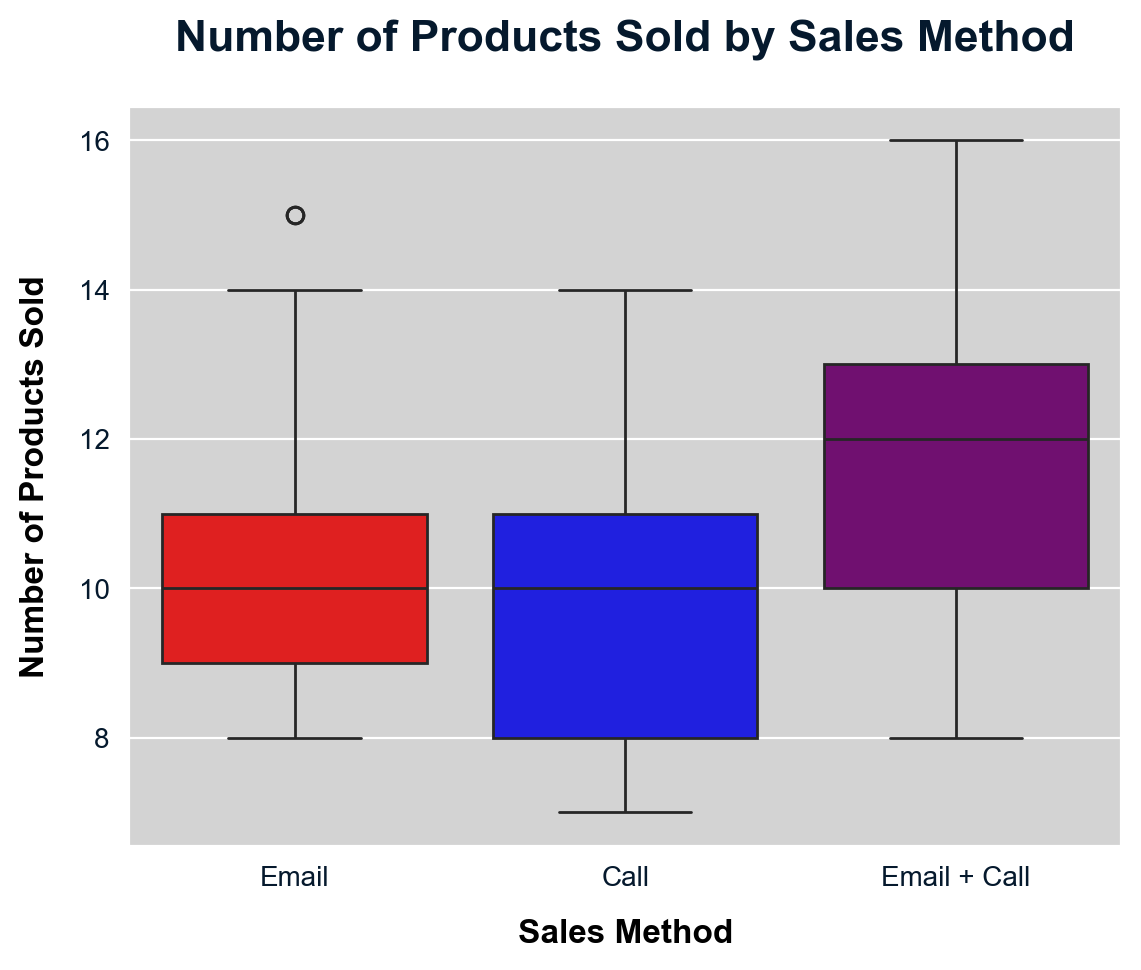

In [394]:
# Create a boxplot to show number of new products sold for each sales method.
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
sns.boxplot(x="sales_method", y="nb_sold", data=sales, color="gray", order=sales["sales_method"].value_counts().index, palette=["red", "blue", "purple"])
plt.title("Number of Products Sold by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Sales Method", fontsize=12, weight="bold", color="black", labelpad=10)
plt.ylabel("Number of Products Sold", fontsize=12, weight="bold", color="black", labelpad=10)
plt.show()

When visualizing the number of years the customers bought from us for each sales method in a boxplot, we can see that the number of years as customers across each sales method are more or less equal to each other. The averages across each sales method show that the number of years as customers are more or less equal to each other. As for ranges, the range of years as customers for the Email method and Call method are slightly equal while the range of years as customers for Email + Call seems to be lower. We can conclude that all three sales methods are the best in terms of number of years as customers per sales method.

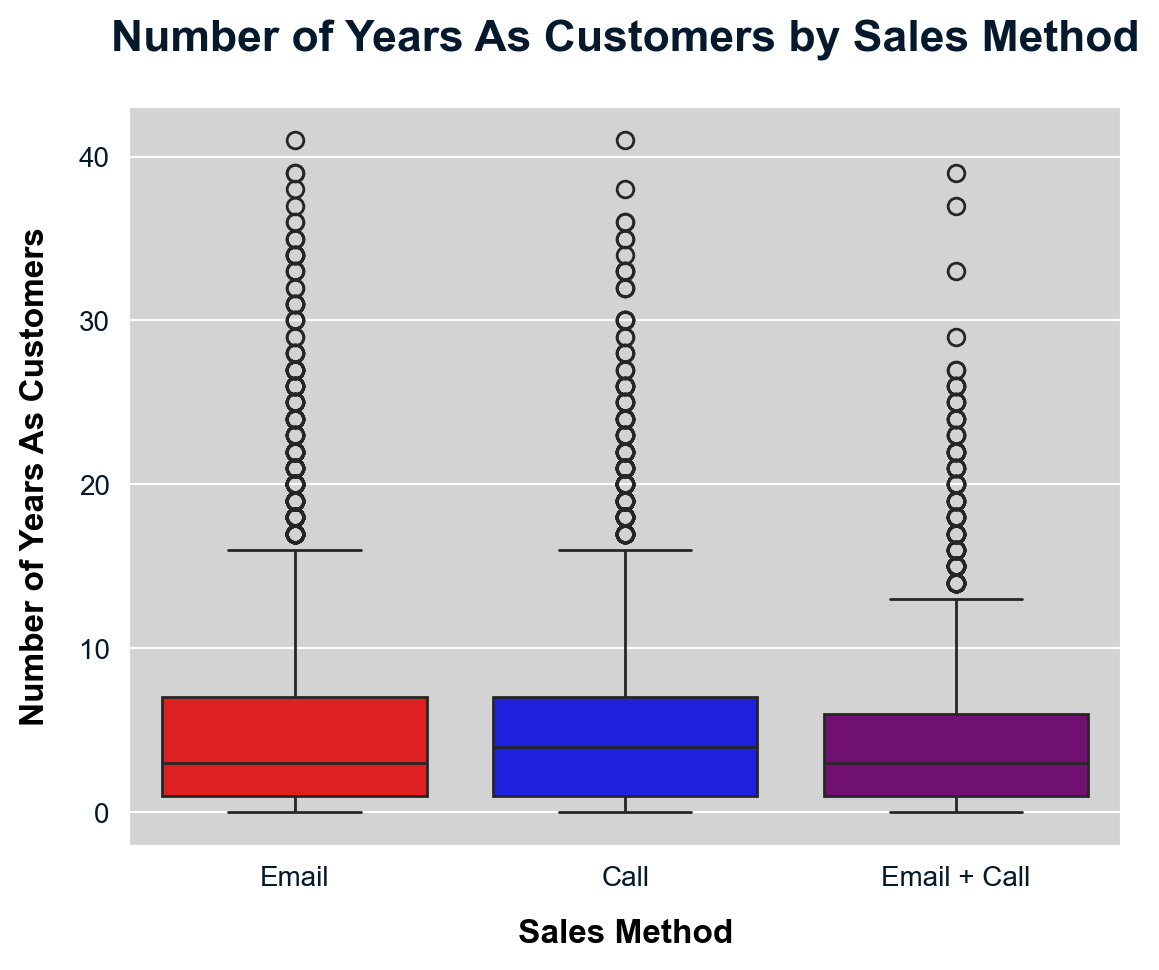

In [395]:
# Create a boxplot to show number of years as customers for each sales method.
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
sns.boxplot(x="sales_method", y="years_as_customer", data=sales, color="gray", order=sales["sales_method"].value_counts().index, palette=["red", "blue", "purple"])
plt.title("Number of Years As Customers by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Sales Method", fontsize=12, weight="bold", color="black", labelpad=10)
plt.ylabel("Number of Years As Customers", fontsize=12, weight="bold", color="black", labelpad=10)
plt.show()

After visualizing the number of site visits for each sales method in the boxplot below, we see that the customers using Email + Call have more site visits on average than those using Email and Call individually. Even though customers using Call have the highest range of site visits than those using Email and those using Email + Call, it has the lowest number of site visits on average. Therefore, since customers using Email + Call are more likely to have more site visits which increases revenue, we can conclude that Email + Call is the best method to use based on the number of site visits per sales method.

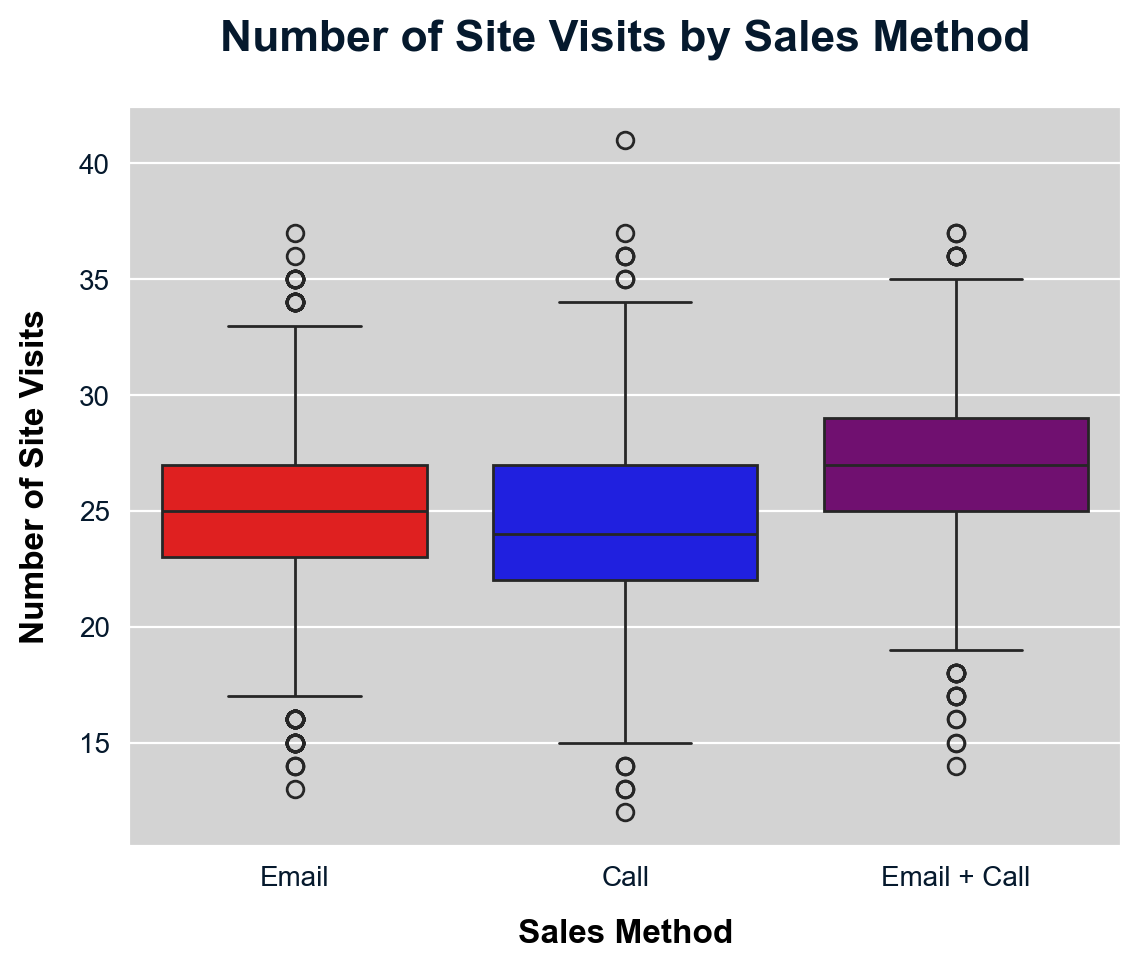

In [396]:
# Create a boxplot to show number of site visits for each sales method.
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
sns.boxplot(x="sales_method", y="nb_site_visits", data=sales, color="gray", order=sales["sales_method"].value_counts().index, palette=["red", "blue", "purple"])
plt.title("Number of Site Visits by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Sales Method", fontsize=12, weight="bold", color="black", labelpad=10)
plt.ylabel("Number of Site Visits", fontsize=12, weight="bold", color="black", labelpad=10)
plt.show()

In the lineplot below which shows average revenue per customer over time for each sales method, we can see which sales method is most efficient in generating revenue over time. In addition to efficiency in generating revenue, we must consider which sales method is most beneficial in minimizing time investment. As we visualize the plot, we can see that Email + Call has the highest average revenue per customer over the course of six weeks compared to the average revenue per customer generated by Email and Call individually. Thus, we can conclude that Email + Call would be the best method to use in terms of generating revenue and saving time.

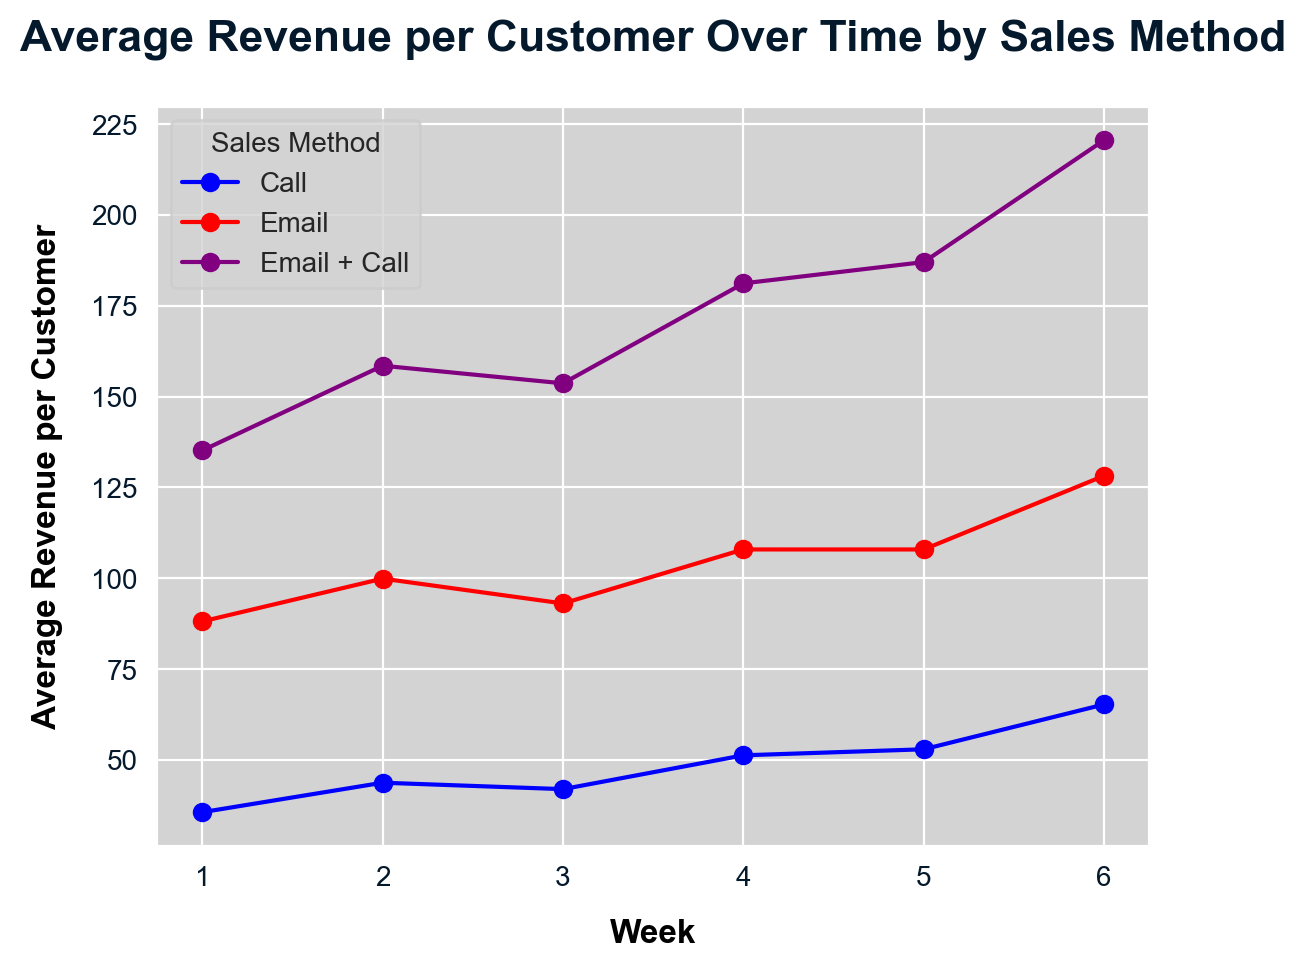

In [397]:
# Create a lineplot to show average revenue per customer over time for each sales method.
revenue_per_customer_over_time = sales.groupby(["week", "sales_method"]).agg({"customer_id": "count", "revenue": "sum"}).reset_index()
revenue_per_customer_over_time["average_revenue_per_customer"] = revenue_per_customer_over_time["revenue"] / revenue_per_customer_over_time["customer_id"]
revenue_per_customer_by_sales_method = revenue_per_customer_over_time.pivot_table(index="week", columns="sales_method", values="average_revenue_per_customer")
sns.set_style("darkgrid", {"axes.facecolor": "lightgray", "grid.color": "white"})
revenue_per_customer_by_sales_method.plot(kind="line", color=["blue", "red", "purple"],  marker="o")
plt.title("Average Revenue per Customer Over Time by Sales Method", fontsize=16, weight="bold", pad=20)
plt.xlabel("Week", fontsize=12, weight="bold", color="black", labelpad=10)
plt.ylabel("Average Revenue per Customer", fontsize=12, weight="bold", color="black", labelpad=10)
plt.legend(title="Sales Method")
plt.show()

Based on the data analysis, I would recommend using **Email + Call** since it is most efficient in generating revenue over time based on number of new products sold, number of site visits, and average revenue generated over time per customer while minimizing time investment.

## Business Metrics

To find the overall best method based on differences between customers per sales method, I recommend using **average revenue per customer's sale efforts** as our metric.

If we want to fully understand the performance of each sales method, we will calculate the average revenue per customer's sales efforts (ARPCSE). ARPCSE shows the total number of revenue per sales method divided by the number of customers per sales method multiplied by sales effort per sales method.
**ARPCSE = Total number of revenue per sales method / (Number of customers per sales method * sales effort per sales method)**

For each sales method in terms of time investment, we will rank them based on amount of effort from least to most. Email has the value of 1 for least effort, Call has the value of 2 for normal effort, and Email + Call has the value of 3 for most effort.

In [398]:
# Calculate the average revenue per customer's sales efforts
sales_efforts = {"Email": 1, "Call": 2, "Email + Call": 3}
revenue_per_customer_sales_effort = sales.groupby("sales_method").agg({"customer_id": "count", "revenue": "sum"}).reset_index()
revenue_per_customer_sales_effort["ARPCSE"] = revenue_per_customer_sales_effort.apply(lambda x: x["revenue"] / (x["customer_id"] * sales_efforts[x["sales_method"]]), axis=1)
print(revenue_per_customer_sales_effort[["sales_method", "ARPCSE"]])

   sales_method     ARPCSE
0          Call  23.798780
1         Email  97.127853
2  Email + Call  61.217022


The ARPCSE results show that Email has the highest ARPCSE compared to the ARPCSEs of Call and Email + Call. Based on the results, it would seem that Email is the best method in terms of average revenue generated per customer's sales efforts.

However, when taking note of additional factors that have been observed in the data analysis, we can conclude that the Email + Call method is the overall best method based on number of new products sold and number of site visits. In addition, Email + Call shows a steady increase in revenue over the course of six weeks. On the other hand, Call has the highest amount of revenue in the first week but it decreases over time.

## Final Summary

Based on all the factors from the data analysis such as revenue over time by sales method, I would recommend we focus on continuing to use Email + Call as our best method for the following reasons:
- While Email has the highest ARPCSE, Email + Call generates the most customer engagement based on the highest amount of site visits and highest number of new products being sold. This method is beneficial in more long term revenue growth.
- Email + Call demonstrates a consistent increase in revenue over the course of six weeks, showing its potential as an efficient method for continued success.
- Call is the least efficient method in terms of effort and revenue growth since it shows a downward trend in revenue over time.

Therefore, when choosing the right method based on differences between customers per sales method, the Email + Call method should be the overall best method for sales efforts as it demonstrates consistent revenue growth, better customer engagement, and sufficient balance between effort and return.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation